In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv("C:\MSc Data Science\Python Projects\Fitness-recommender\Personal-workout-recommender\data\megaGymDataset.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

<>:2: SyntaxWarning:

invalid escape sequence '\M'

<>:2: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\muzam\AppData\Local\Temp\ipykernel_49372\3031835072.py:2: SyntaxWarning:

invalid escape sequence '\M'



,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [3]:
#Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   object 
 1   Desc        1368 non-null   object 
 2   Type        2918 non-null   object 
 3   BodyPart    2918 non-null   object 
 4   Equipment   2886 non-null   object 
 5   Level       2918 non-null   object 
 6   Rating      1031 non-null   float64
 7   RatingDesc  862 non-null    object 
dtypes: float64(1), object(7)
memory usage: 182.5+ KB


In [4]:
# Check the stats of the dataset
df.describe()

,Rating
count,1031.000000
mean,5.919690
std,3.584607
min,0.000000
25%,3.000000
50%,7.900000
75%,8.700000
max,9.600000


In [5]:
df.shape

(2918, 8)

In [6]:
df.columns

Index(['Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating',
       'RatingDesc'],
      dtype='object')

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64


In [8]:
# Check for duplicates
print("Duplicate values in the dataset:")
print(df['Title'].duplicated().sum())

df[df['Title'].duplicated(keep=False)].sort_values('Title')

Duplicate values in the dataset:
9


,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2540,Arnold press,Named after the iconic bodybuilder and movie s...,Strength,Shoulders,Dumbbell,Intermediate,8.9,Average
2655,Arnold press,Named after the iconic bodybuilder and movie s...,Strength,Shoulders,Dumbbell,Intermediate,8.9,Average
919,Band-suspended kettlebell bench press,The band-suspended kettlebell bench press is a...,Strength,Chest,Bands,Intermediate,NaN,NaN
939,Band-suspended kettlebell bench press,The band-suspended kettlebell bench press is a...,Strength,Chest,Bands,Intermediate,NaN,NaN
958,Band-suspended kettlebell bench press,The band-suspended kettlebell bench press is a...,Strength,Chest,Bands,Intermediate,NaN,NaN
10,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average
97,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average
1922,Dumbbell step-up,The dumbbell step-up is a great exercise for b...,Strength,Quadriceps,Dumbbell,Intermediate,8.2,Average
2004,Dumbbell step-up,The dumbbell step-up is a great exercise for b...,Strength,Quadriceps,Dumbbell,Intermediate,8.2,Average
163,Exercise Ball Cable Crunch - Gethin Variation,The exercise ball crunch is a popular gym exer...,Strength,Abdominals,Cable,Intermediate,NaN,NaN


In [9]:
df['BodyPart'].value_counts()

BodyPart
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: count, dtype: int64

In [10]:
df['Level'].value_counts()

Level
Intermediate    2446
Beginner         459
Expert            13
Name: count, dtype: int64

In [11]:
df['Type'].value_counts()

Type
Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: count, dtype: int64

In [12]:
df['Equipment'].value_counts()

Equipment
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64

In [13]:
df[df['Desc'].isnull()].sample(5)

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2706,30 Shoulders Cable Straight-Bar Front Raise,NaN,Strength,Shoulders,Cable,Intermediate,NaN,NaN
954,Extended Range One-Arm Kettlebell Floor Press,NaN,Strength,Chest,Kettlebells,Beginner,6.3,Average
330,McGill Modified Curl-Up,NaN,Strength,Abdominals,Body Only,Intermediate,NaN,NaN
1022,Holman Feet-Elevated Push-Up,NaN,Strength,Chest,Body Only,Intermediate,NaN,NaN
1753,Clean Shrug,NaN,Olympic Weightlifting,Traps,Barbell,Beginner,6.8,Average


In [14]:
df[df[['Desc','Rating','RatingDesc']].isnull().all(axis=1)].sample(5)

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
373,HM Left Side Bird-Dog,NaN,Strength,Abdominals,Body Only,Intermediate,NaN,NaN
1607,HM Banana Stretch,NaN,Strength,Lower Back,Body Only,Intermediate,NaN,NaN
371,HM Right Side Hollow Hold with Pulse,NaN,Strength,Abdominals,Body Only,Intermediate,NaN,NaN
553,Holman High-Impact Crab Kick,NaN,Strength,Abdominals,Body Only,Intermediate,NaN,NaN
2251,HM Garland Pose,NaN,Strength,Quadriceps,Body Only,Intermediate,NaN,NaN


In [15]:
df.drop(columns = 'Rating', inplace=True)

In [16]:
df.drop(columns = 'RatingDesc', inplace=True)

In [17]:
df

,Title,Desc,Type,BodyPart,Equipment,Level
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate
2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner
2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate
2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate


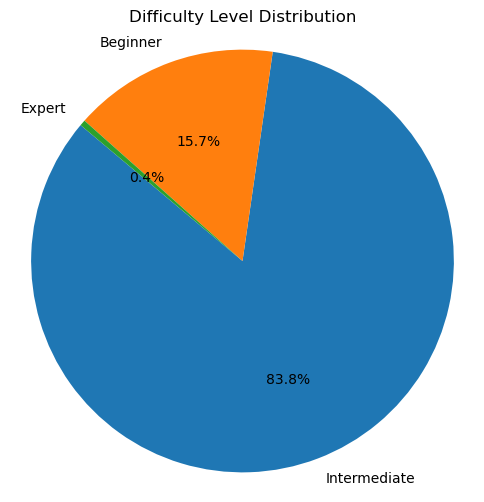

In [18]:
level_counts = df['Level'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Difficulty Level Distribution')
plt.axis('equal')
plt.show()

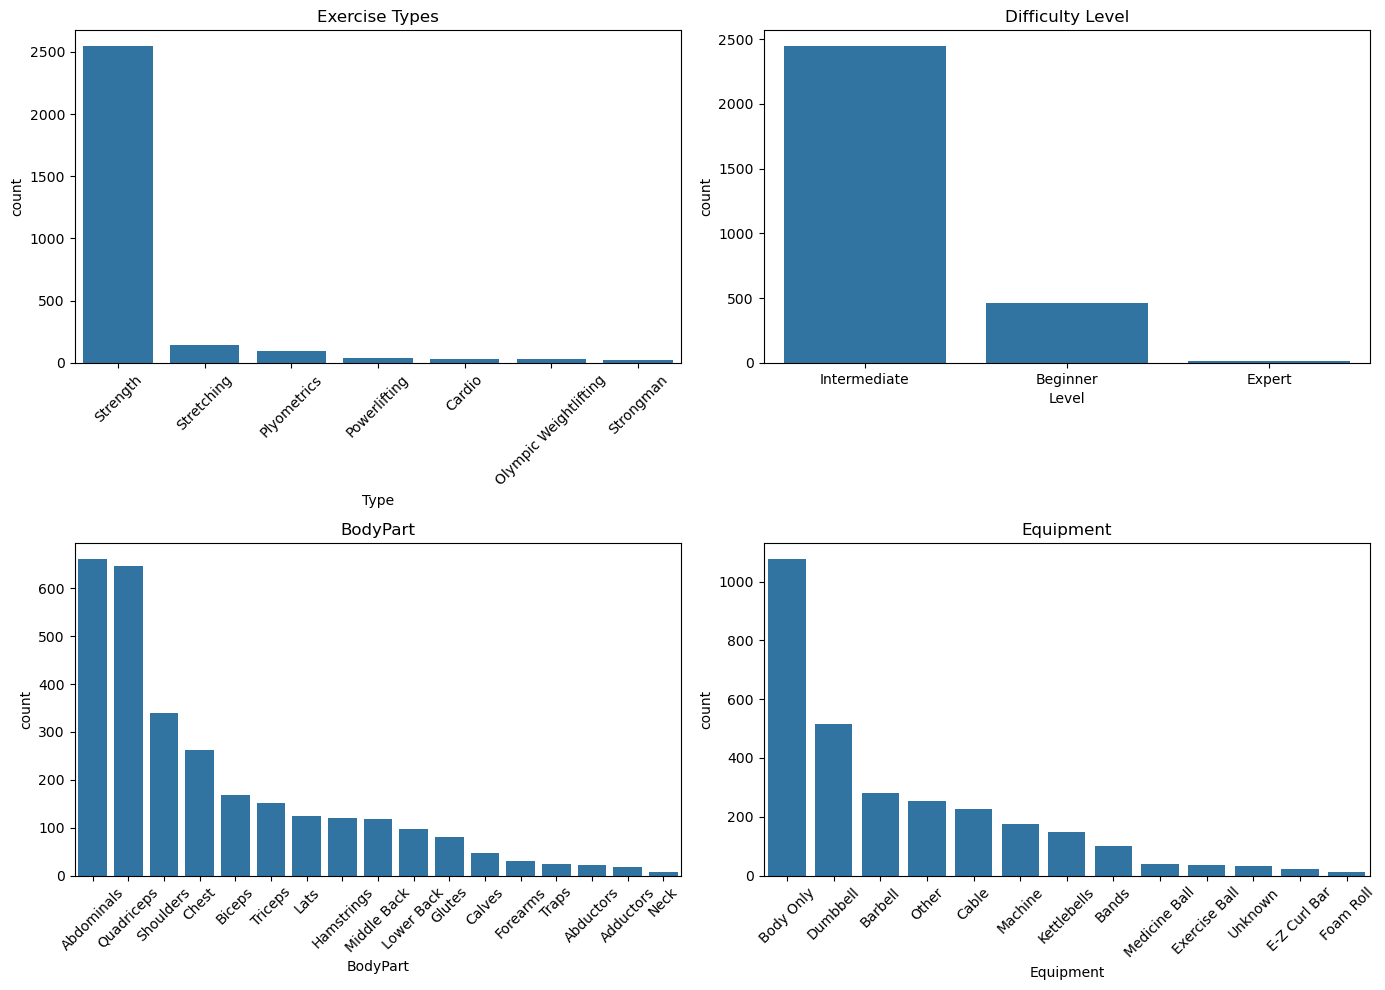

In [19]:
fig, axes = plt.subplots(2,2, figsize= (14,10))
sns.countplot(data=df, x='Type', ax= axes[0,0], order=df['Type'].value_counts().index)
axes[0,0].set_title('Exercise Types')
axes[0,0].tick_params('x',rotation=45)

sns.countplot(data=df, x='Level', ax = axes[0,1], order=df['Level'].value_counts().index)
axes[0,1].set_title('Difficulty Level')

sns.countplot(data= df, x='BodyPart', ax= axes[1,0], order=df['BodyPart'].value_counts().index)
axes[1,0].set_title("BodyPart")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df.fillna({'Equipment':'Unknown'}), x='Equipment', ax=axes[1,1], order=df['Equipment'].fillna('Unknown').value_counts().index)
axes[1,1].set_title('Equipment')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:
pyo.init_notebook_mode(connected=True)

type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

fig = px.bar(type_counts, x='Type', y='Count', title='Exercise Types Distribution',
             color='Type', text='Count')

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)

pyo.iplot(fig)

In [21]:
level_counts = df['Level'].value_counts().reset_index()
level_counts.columns = ['Level', 'Count']

px.bar(level_counts, x='Level', y='Count', title='Difficulty Level Distribution',
       color='Level', text='Count').show()
fig.show()

In [26]:
df.to_csv("C:\\MSc Data Science\\Python Projects\\Fitness-recommender\\Personal-workout-recommender\\data\\cleaned_gym_exercise_data.csv", index=False)